# Molecule and electronic structure info method dev.
29/04/20

Aims
- Improve current utility functions (jobSummary, jobInfo, molInfo).
- Make use of cclib for more molecular structure info.
- Orbitals etc...?

For early dev work see (Bemo):
- http://localhost:8890/lab/tree/cclib_basic_tests_040420.ipynb
- http://localhost:8890/lab/tree/XeF2_props_oc-avo-cclib_070420.ipynb

## Current status

In [1]:
!hostname
!conda env list

bemo
# conda environments:
#
base                     /home/femtolab/anaconda3
chem                     /home/femtolab/anaconda3/envs/chem
chem3.5                  /home/femtolab/anaconda3/envs/chem3.5
dbtest                   /home/femtolab/anaconda3/envs/dbtest
epsdev                *  /home/femtolab/anaconda3/envs/epsdev
epsdev-150320            /home/femtolab/anaconda3/envs/epsdev-150320
espressoDB               /home/femtolab/anaconda3/envs/espressoDB
fibre-sim                /home/femtolab/anaconda3/envs/fibre-sim
remote                   /home/femtolab/anaconda3/envs/remote
slides                   /home/femtolab/anaconda3/envs/slides
webDev                   /home/femtolab/anaconda3/envs/webDev



In [2]:
import sys
import os
import numpy as np

# For module testing, include path to module here
modPath = r'/home/femtolab/github/ePSproc'
sys.path.append(modPath)
import epsproc as ep
# import epsproc as ep

* plotly not found, plotly plots not available. 
* pyevtk not found, VTK export not available. 


In [3]:
# Load data from modPath\data
dataFile = os.path.join(modPath, 'data/photoionization/no2_demo_ePS.out')

jobInfo = ep.headerFileParse(dataFile)
molInfo = ep.molInfoParse(dataFile)

*** Job info from file header.

 NO2 input file for ePolyScat
 Ionization of orbital 10 (A2)
 For comparison with tutorial calculations
 Using (modified) version of RLL's sample job, with added DumpIdy commands.  Should allow for like-for-like comparison with my calcs. from "no2_MolPro_RLL_ePS.inp"

*** Found orbitals
1   1 Ene =     -20.6836 Spin =Alpha Occup =   2.000000
2   2 Ene =     -20.6835 Spin =Alpha Occup =   2.000000
3   3 Ene =     -15.8756 Spin =Alpha Occup =   2.000000
4   4 Ene =      -1.6596 Spin =Alpha Occup =   2.000000
5   5 Ene =      -1.4794 Spin =Alpha Occup =   2.000000
6   6 Ene =      -0.9198 Spin =Alpha Occup =   2.000000
7   7 Ene =      -0.7787 Spin =Alpha Occup =   2.000000
8   8 Ene =      -0.7778 Spin =Alpha Occup =   2.000000
9   9 Ene =      -0.7587 Spin =Alpha Occup =   2.000000
10  10 Ene =      -0.5509 Spin =Alpha Occup =   2.000000
11  11 Ene =      -0.5284 Spin =Alpha Occup =   2.000000
12  12 Ene =      -0.5079 Spin =Alpha Occup =   1.000000

*** 


*** Job summary data
 NO2 input file for ePolyScat
 Ionization of orbital 10 (A2)
 For comparison with tutorial calculations
 Using (modified) version of RLL's sample job, with added DumpIdy commands.  Should allow for like-for-like comparison with my calcs. from "no2_MolPro_RLL_ePS.inp"

Electronic structure input: '/media/hockettp/StoreM/ePolyScat_stuff/no2/electronic_structure/no2_RLL.molden'
Initial state occ:		 [2 2 2 2 2 2 2 2 2 2 2 1]
Final state occ:		 [2 2 2 2 2 2 2 2 2 2 1 1]
IPot (input vertical IP, eV):		 13.592

*** Additional orbital info (SymProd)
Ionizing orb:			 [0 0 0 0 0 0 0 0 0 0 1 0]
Ionizing orb sym:		 ['A2']
Orb energy (eV):		 [-14.37849637]
Orb energy (H):			 [-0.5284]
Orb energy (cm^-1):		 [-115970.39521897]
Threshold wavelength (nm):	 86.22890334312088

*** Warning: some orbital convergences outside single-center expansion convergence tolerance (0.01):
[[1.         0.97834773]
 [2.         0.97879664]]

*** Molecular structure



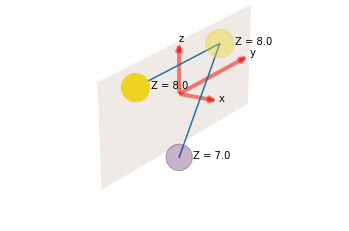

In [4]:
ep.util.jobSummary(jobInfo, molInfo);

In [5]:
# Full info in dicts
jobInfo

{'comments': ['# NO2 input file for ePolyScat',
  '# Ionization of orbital 10 (A2)',
  '# For comparison with tutorial calculations',
  '# Using (modified) version of RLL\'s sample job, with added DumpIdy commands.  Should allow for like-for-like comparison with my calcs. from "no2_MolPro_RLL_ePS.inp"',
  '# Note that original version runs as a shell script, here just taken the ePS part for speed, but should consider full scripting as a better & more versatile option!',
  '# 10/08/15',
  '#',
  '# IP=13.592',
  '# Energy=0.81',
  '#',
  '# date',
  '#',
  '# maindir=~/Projects/NO2MFPAD/Sample',
  '# maindir=/media/hockettp/StoreM/ePolyScat_stuff/no2',
  '# mkdir /idy',
  '#',
  '# ~/Applications/ePolyScat.E3/bin/ePolyScat <<eoi',
  '#',
  '# IPot     # IPot, ionization potential, Koopmans',
  '#',
  "# Convert '/.molden' 'molden2006'",
  '#',
  '# Write out matrix elements',
  '# OrientCro run',
  '#',
  '# eoi',
  '#',
  '#',
  '# ~/Applications/ePolyScat.E3/bin/BendOrient.exe <<eoi',

In [6]:
molInfo

{'atomList': ['Z =  7 ZS =  7 r =   0.0000000000   0.0000000000  -0.3256373649',
  'Z =  8 ZS =  8 r =   0.0000000000   1.0989812449   0.1425398727',
  'Z =  8 ZS =  8 r =   0.0000000000  -1.0989812449   0.1425398727'],
 'atomTable': <xarray.DataArray (atom: 3, props: 5)>
 array([[ 7.        ,  7.        ,  0.        ,  0.        , -0.32563736],
        [ 8.        ,  8.        ,  0.        ,  1.09898124,  0.14253987],
        [ 8.        ,  8.        ,  0.        , -1.09898124,  0.14253987]])
 Coordinates:
   * atom     (atom) int64 1 2 3
   * props    (props) <U2 'Z' 'Zs' 'x' 'y' 'z',
 'orbList': array([[ 1,  4,  1,  1,  1],
        [ 2,  1,  1,  2,  1],
        [ 3,  1,  1,  3,  1],
        [ 4,  1,  1,  4,  1],
        [ 5,  4,  1,  5,  1],
        [ 6,  1,  1,  6,  1],
        [ 7,  4,  1,  7,  1],
        [ 8,  1,  1,  8,  1],
        [ 9,  3,  1,  9,  1],
        [10,  4,  1, 10,  1],
        [11,  2,  1, 11,  1],
        [12,  1,  1, 12,  1]]),
 'orbTable': <xarray.DataArray (o

## Testing...

### File methods from jobInfo

In [7]:
from pathlib import Path

In [17]:
print(jobInfo['Convert'][0].split()[1].strip("'"))

/media/hockettp/StoreM/ePolyScat_stuff/no2/electronic_structure/no2_RLL.molden


In [18]:
testPath = Path(jobInfo['Convert'][0].split()[1].strip("'"))

In [19]:
testPath.parent

PosixPath('/media/hockettp/StoreM/ePolyScat_stuff/no2/electronic_structure')

In [21]:
testPath.name

'no2_RLL.molden'

In [23]:
testPath.is_file()

False

In [26]:
Path('/home', testPath.name)

PosixPath('/home/no2_RLL.molden')